Zad. 7

Za pomocą odpowiednich symulacji zbadać moc testu Kołmogorowa-Smirnowa w przypadku, gdy
rozważane próbki danych pochodzą w rozkładów normalnych o tej samej wartości oczekiwanej, ale o
różnych odchyleniach standardowych. Rozważyć różne wartości oczekiwane. Uzyskane wyniki należy
przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych (można rozważać różne liczebności w każdej z próbek),
- odchyleń standardowych.

In [30]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
import pandas as pd
import seaborn as sns

# Parametry
stds = [i for i in range(1, 11, 1)]
means = [i for i in range(1, 11, 2)]
SampleSizes = [i for i in range(10, 101, 10)]  # rozmiary próbek
simulations_number = 100  # liczba symulacji


Inicjalizacja zmiennych i parametrów, których potrzebujemy do algorytmu symulacyjnego

In [31]:
results = []

for mean in means:
    for Sample in SampleSizes:
        for std_dev1 in stds:
            for std_dev2 in stds:
                if std_dev1 != std_dev2:  # upewniamy się, że odchylenia standardowe są różne
                    # Inicjalizacja licznika
                    ks_counter = 0

                    for _ in range(simulations_number):
                        # Generowanie danych
                        data1 = np.random.normal(loc=mean, scale=std_dev1, size=Sample)
                        data2 = np.random.normal(loc=mean, scale=std_dev2, size=Sample)

                        # Test Kołmogorowa-Smirnowa
                        ks_stat, p_val_ks = stats.ks_2samp(data1, data2)
                        if p_val_ks < 0.05:
                            ks_counter += 1

                    # Zapisanie wyników
                    results.append([mean, Sample, std_dev1, std_dev2, ks_counter/simulations_number])


Porównywujemy każde odchylenie z każdym prócz samych siebie, i generujemy podwójne dane z rozkładów normalnych, które testujemy za pomocą testu K-S

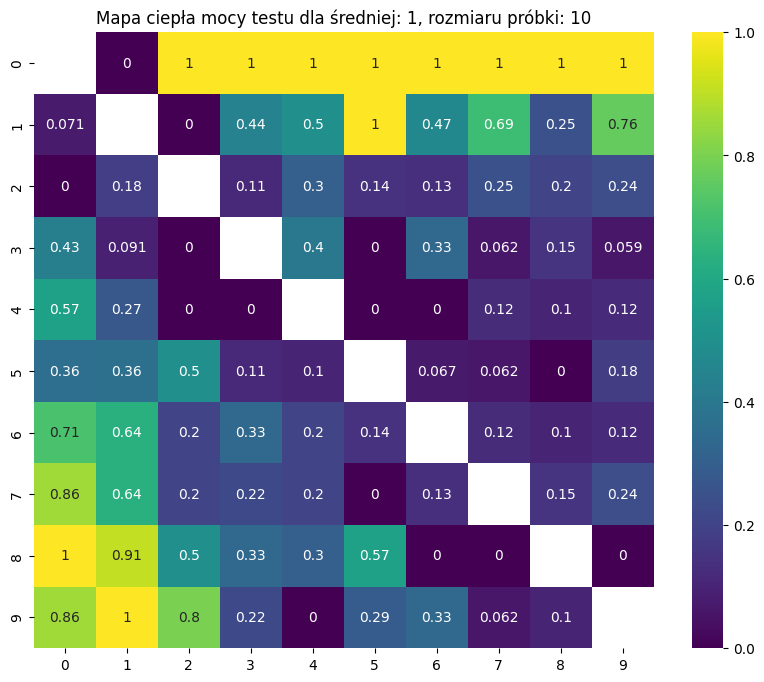

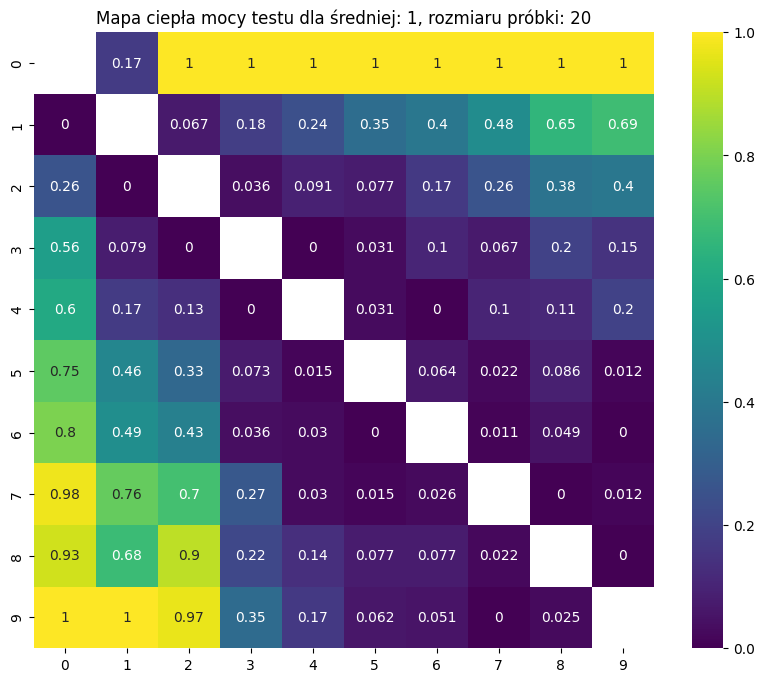

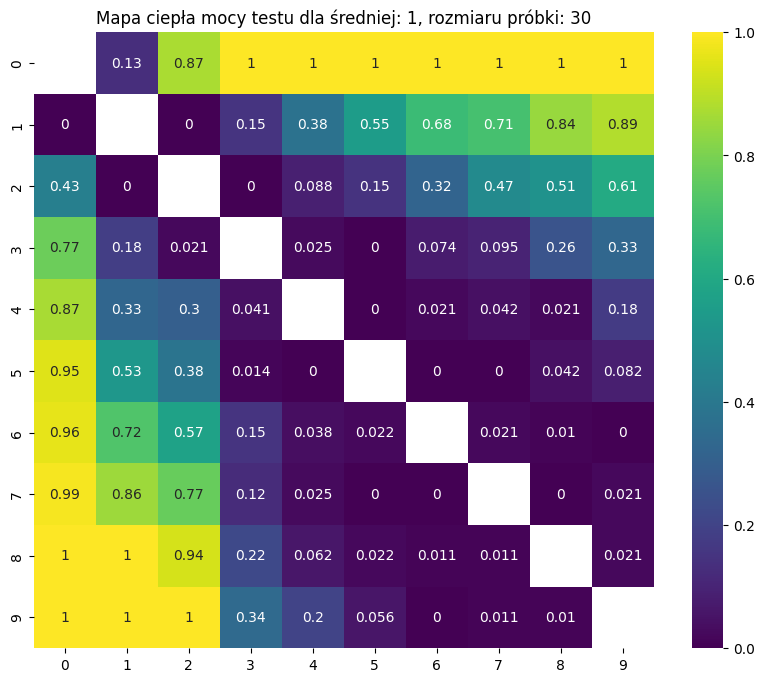

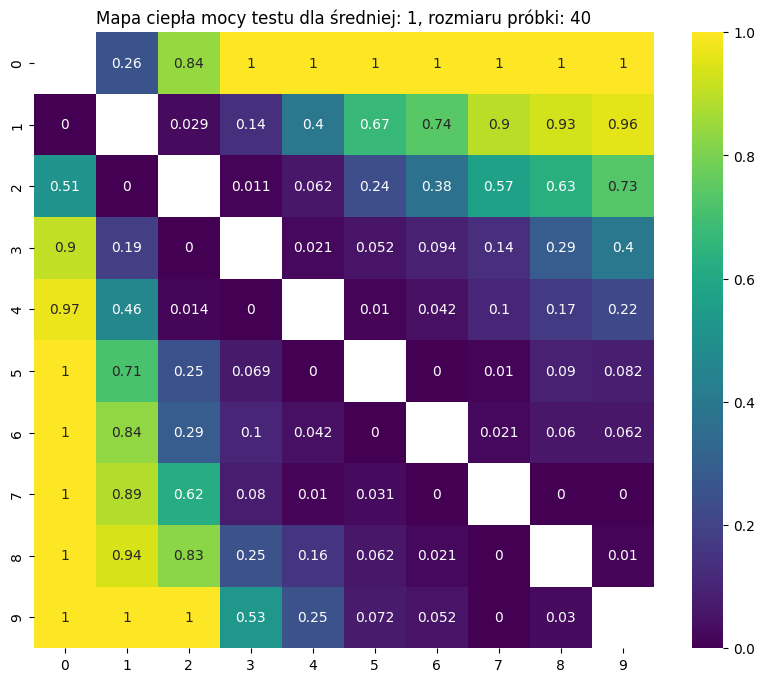

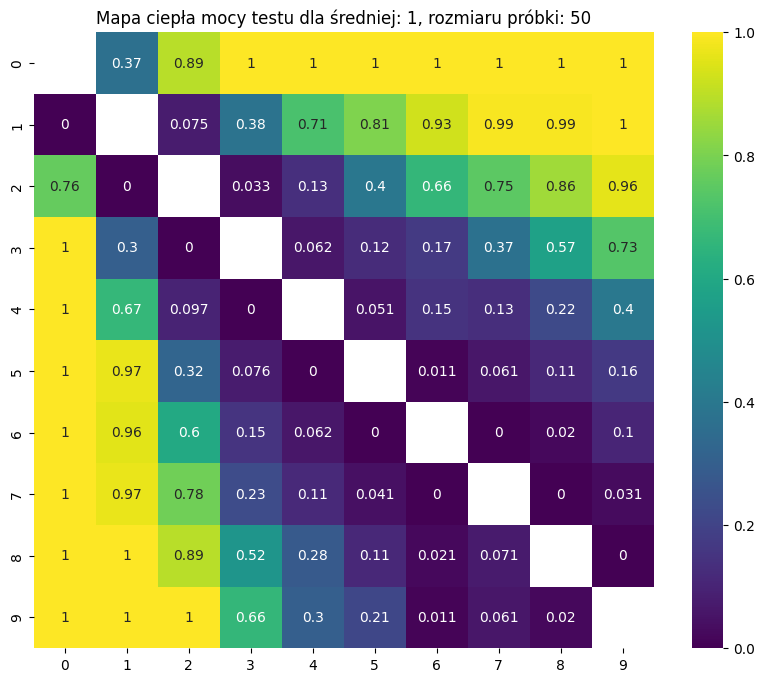

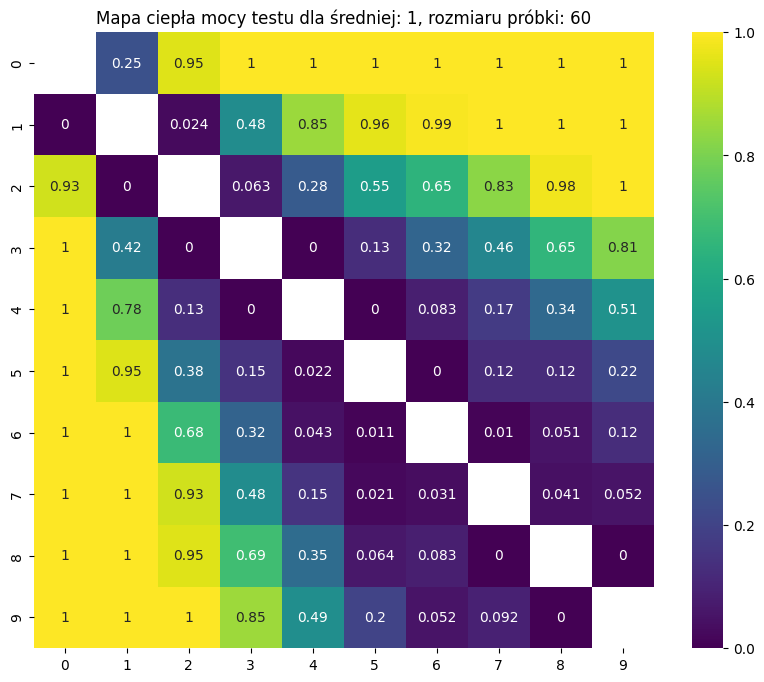

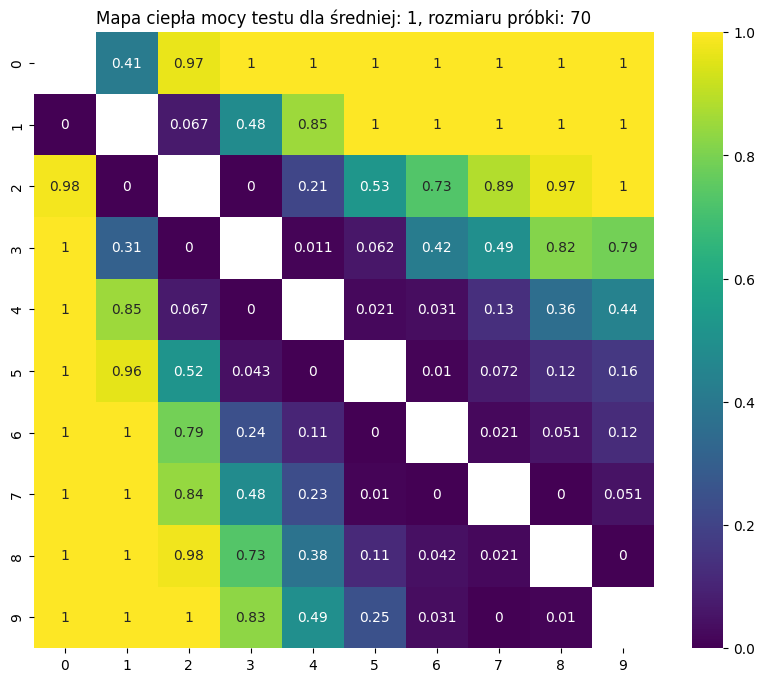

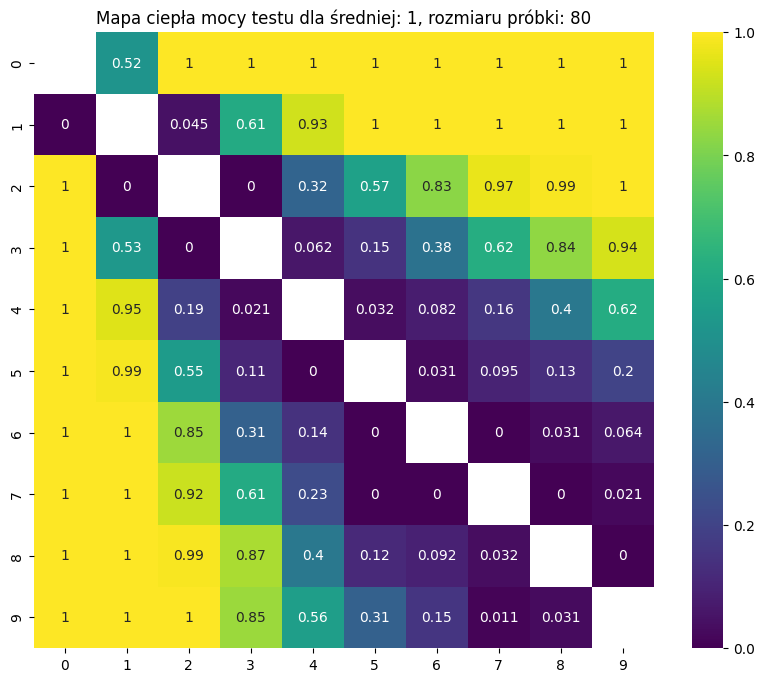

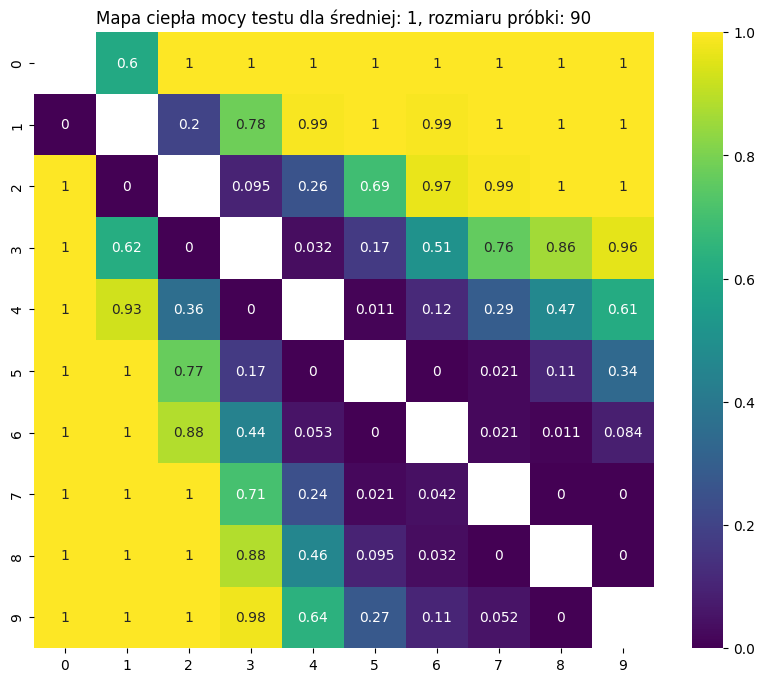

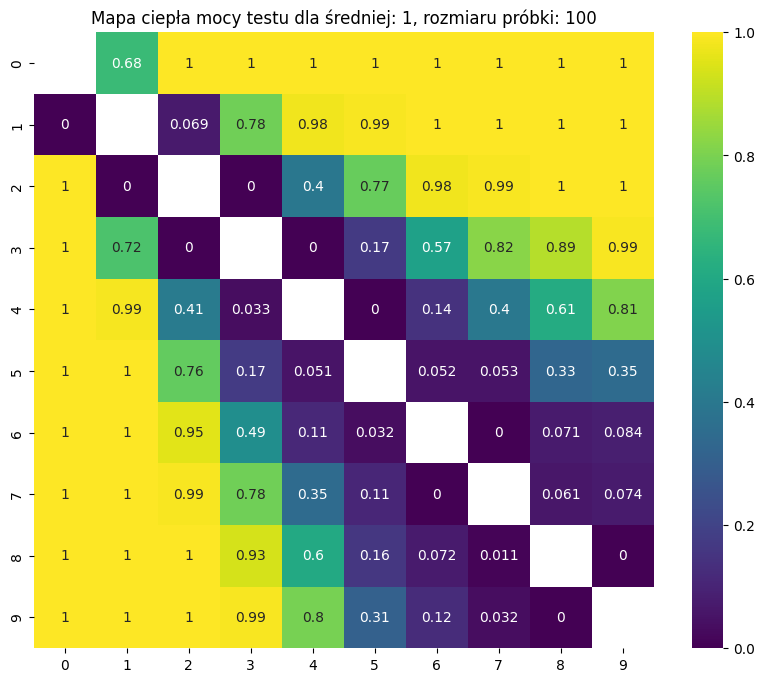

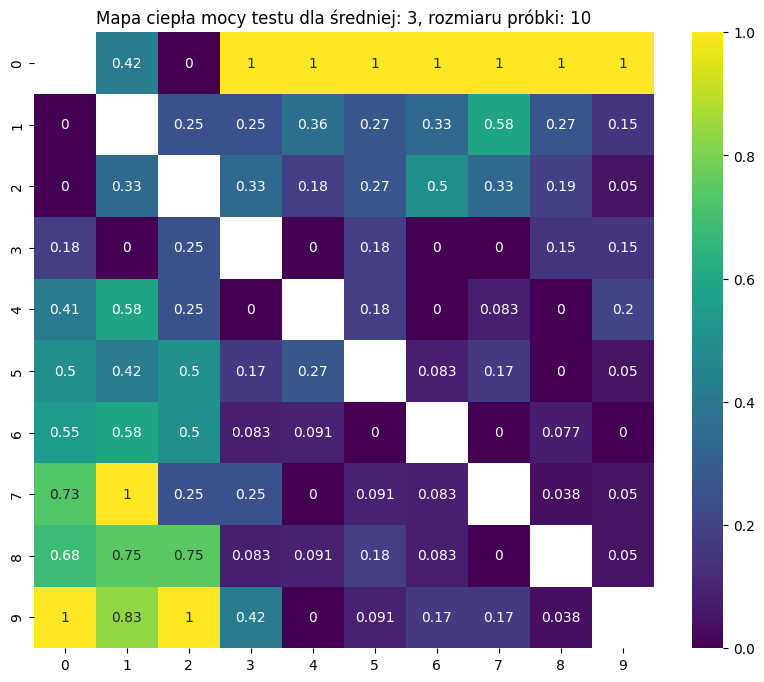

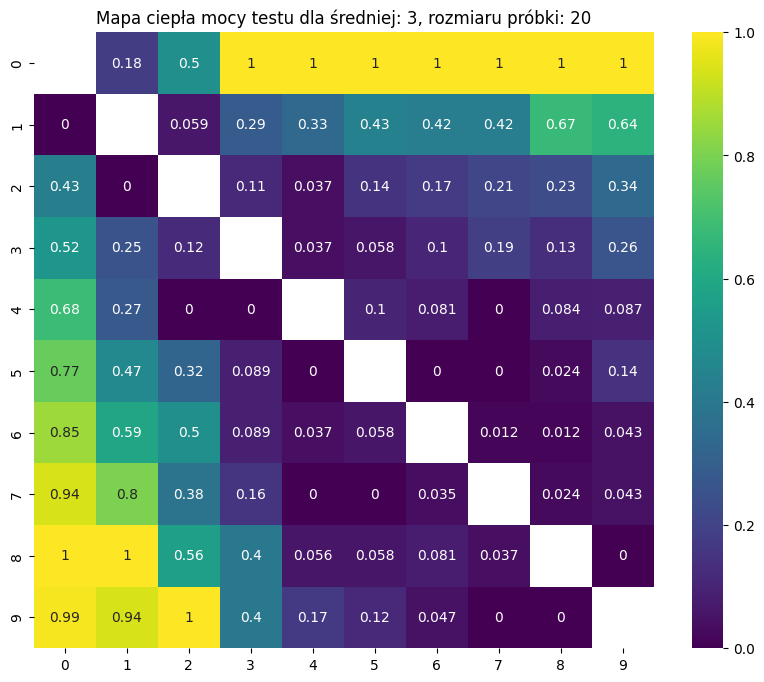

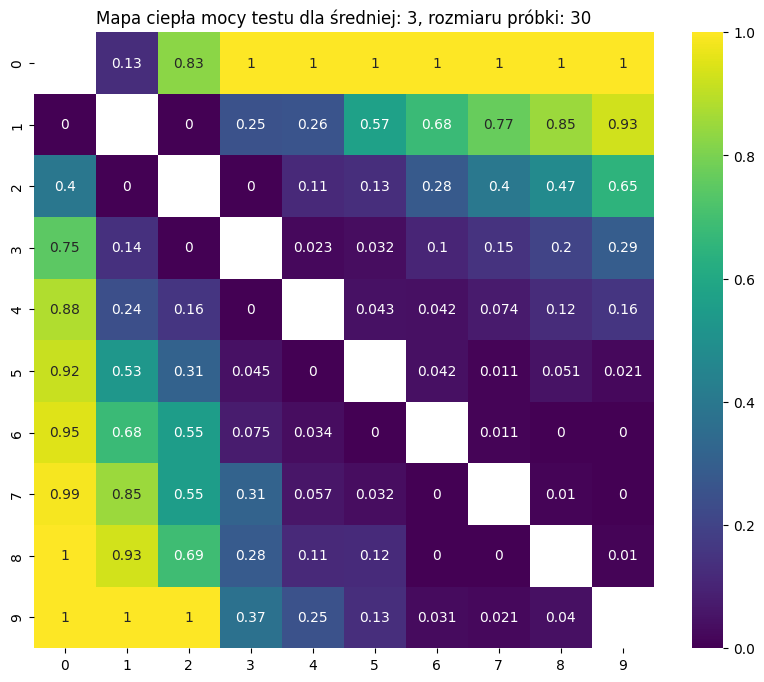

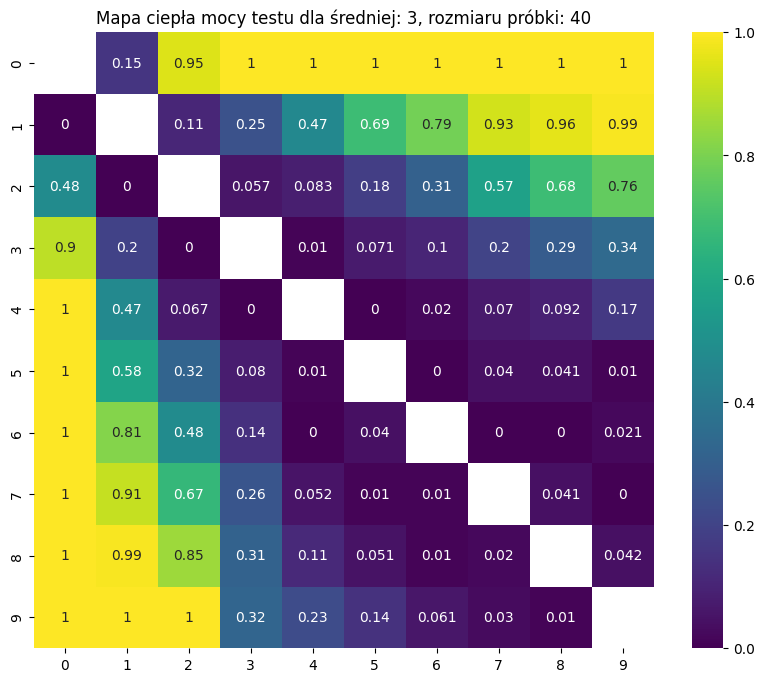

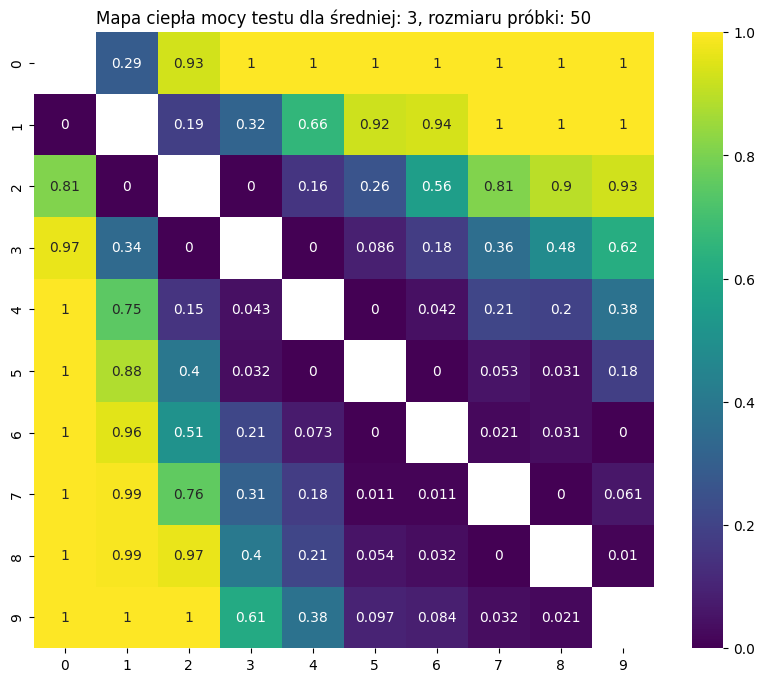

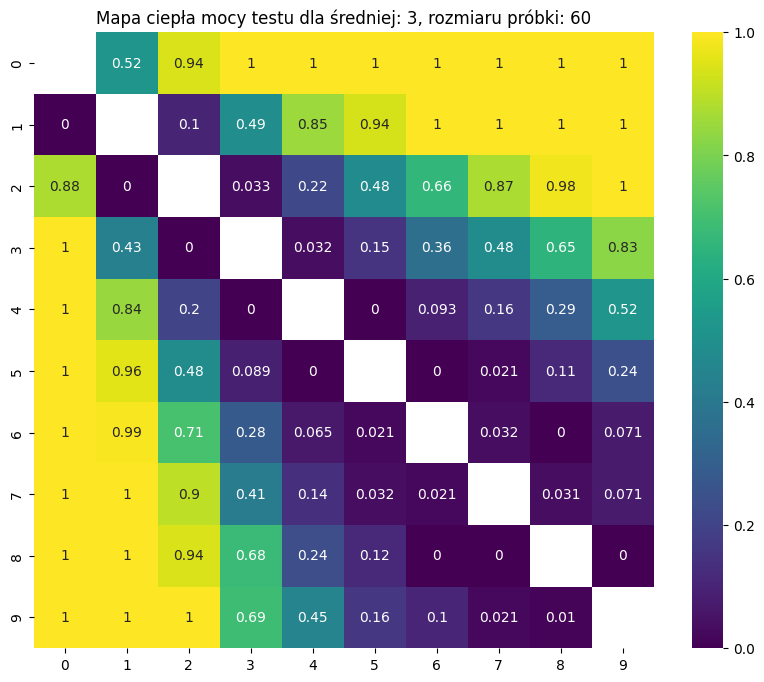

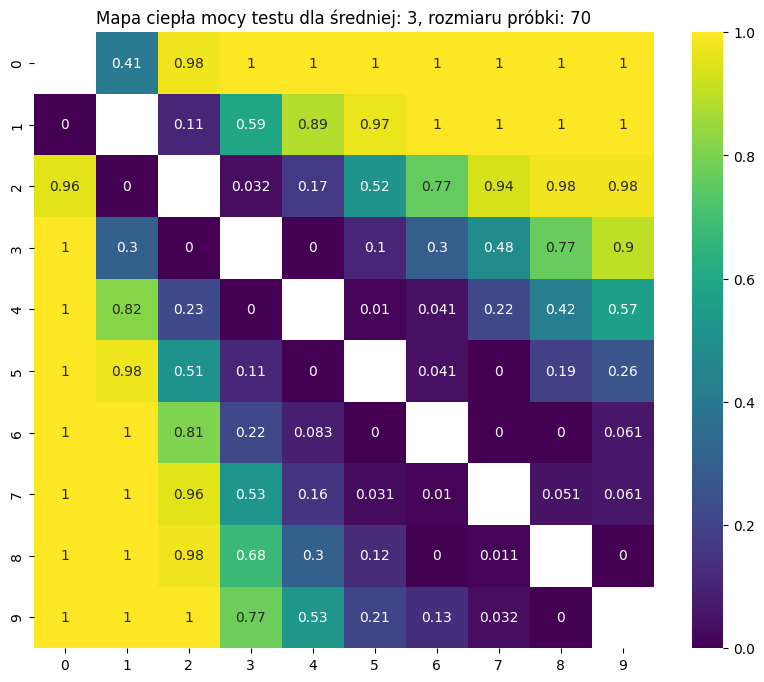

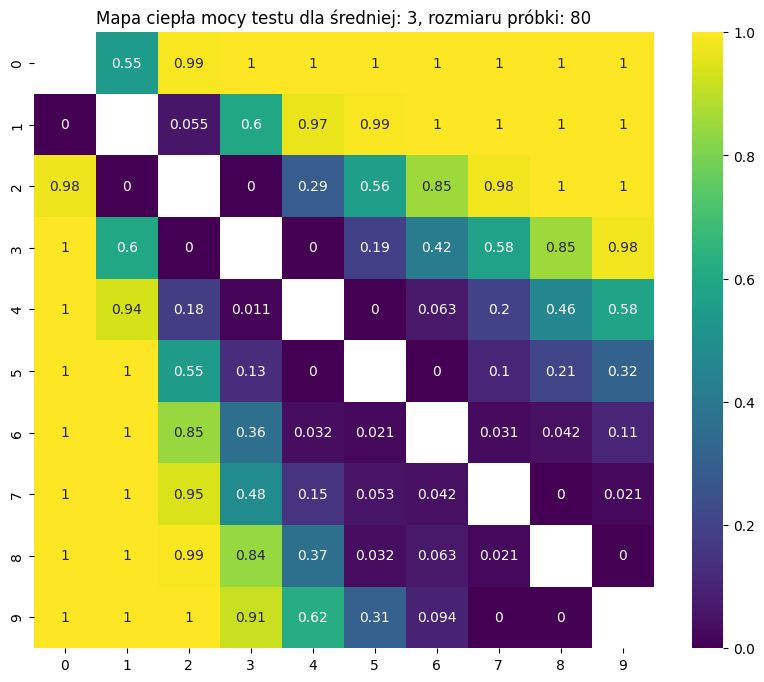

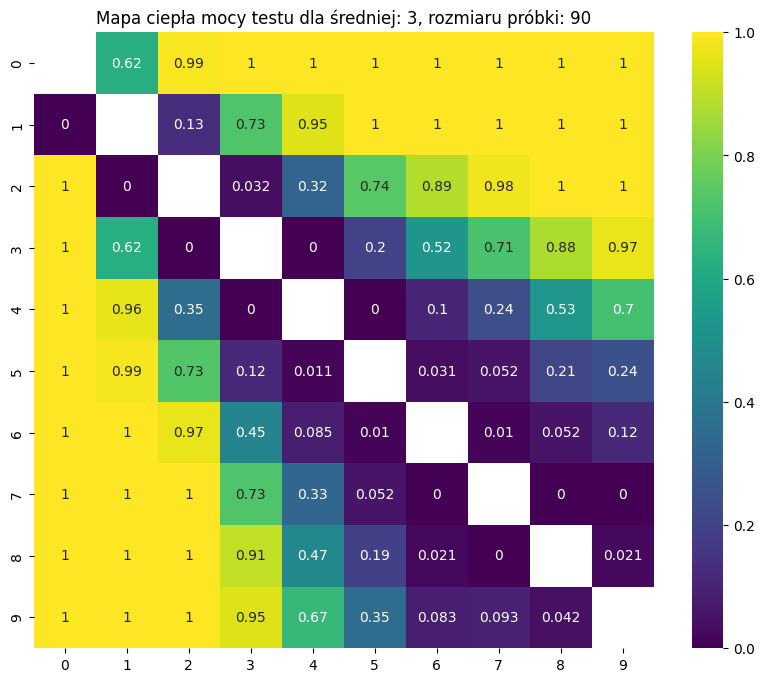

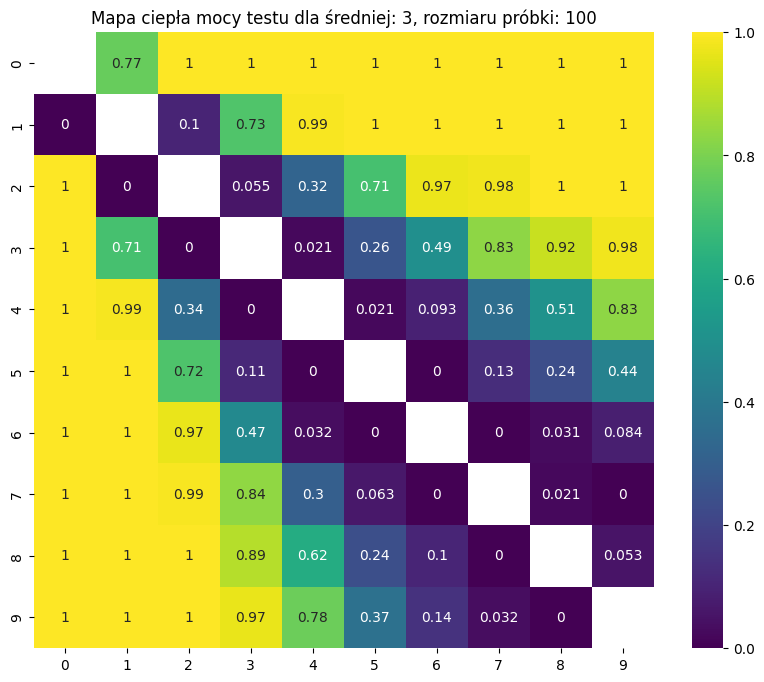

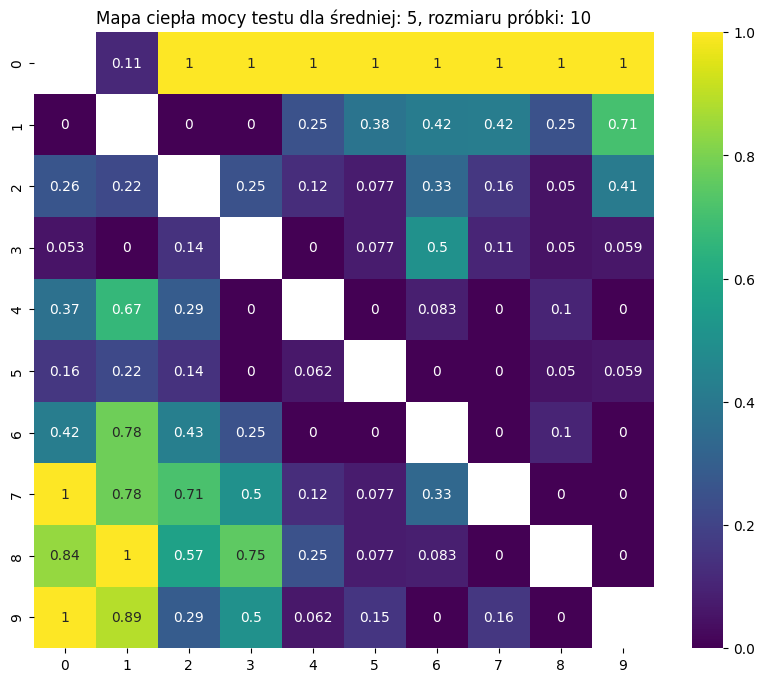

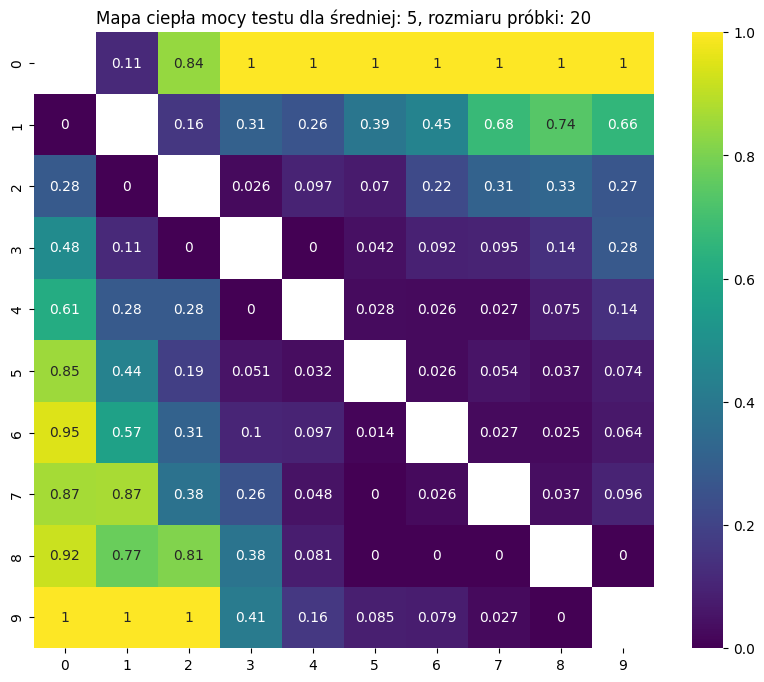

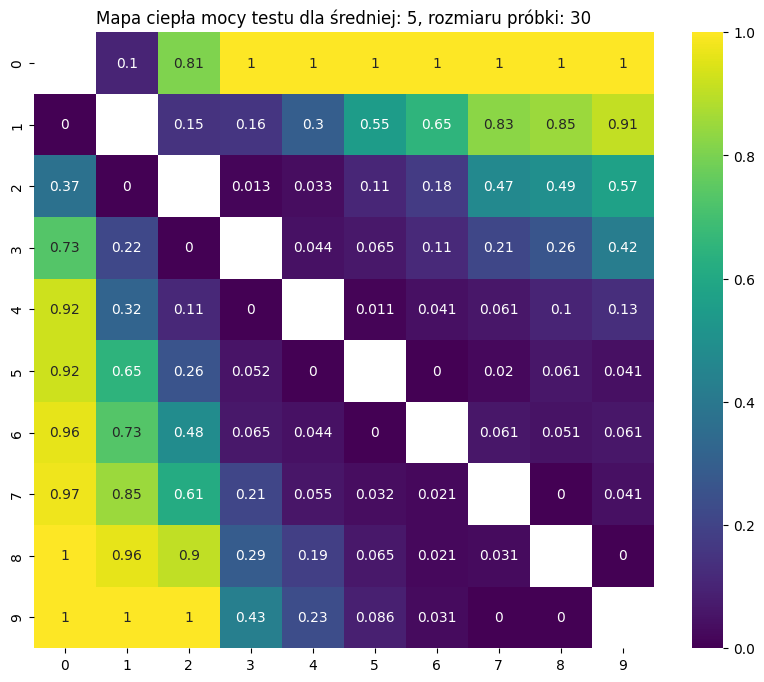

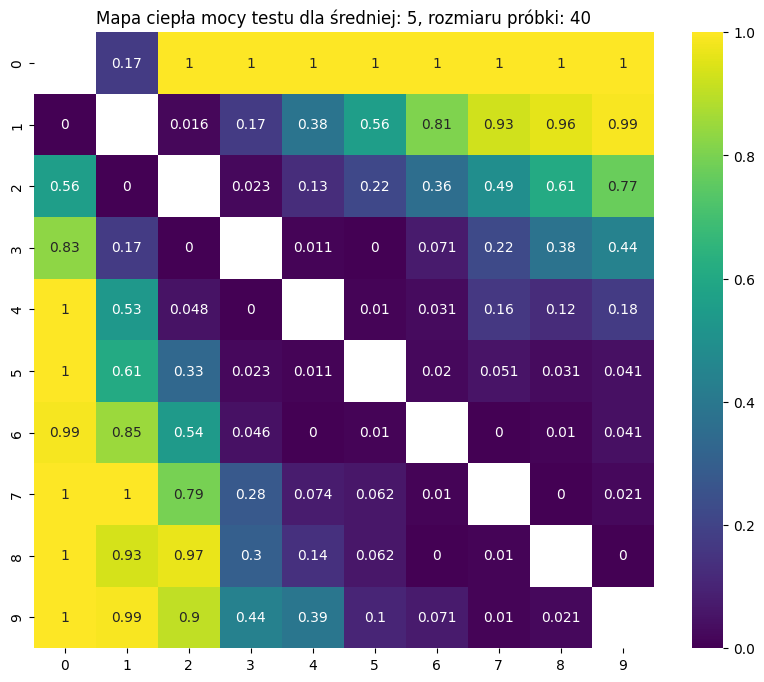

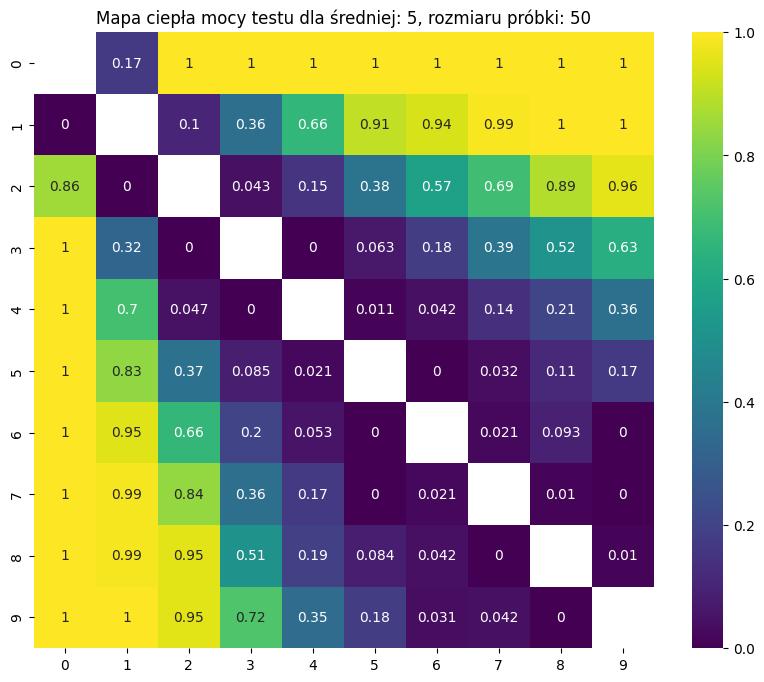

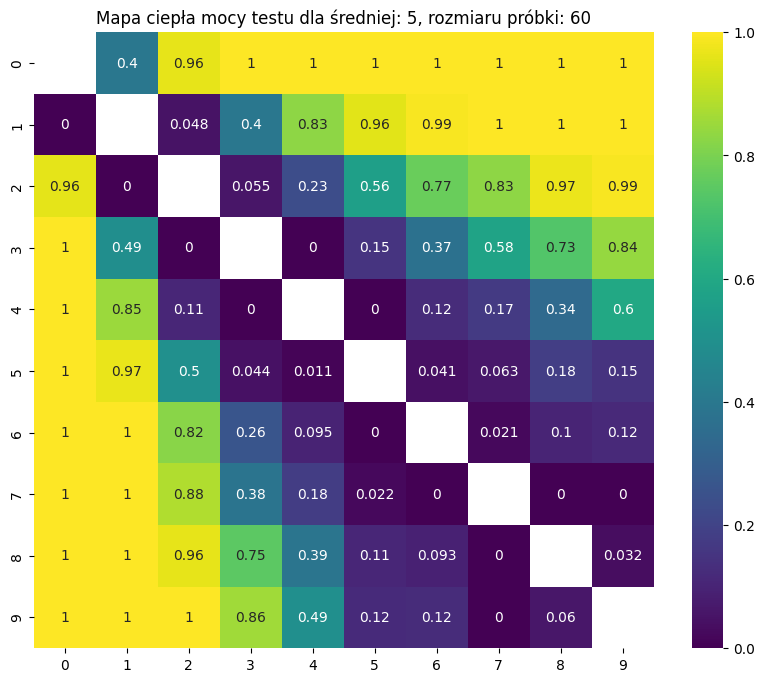

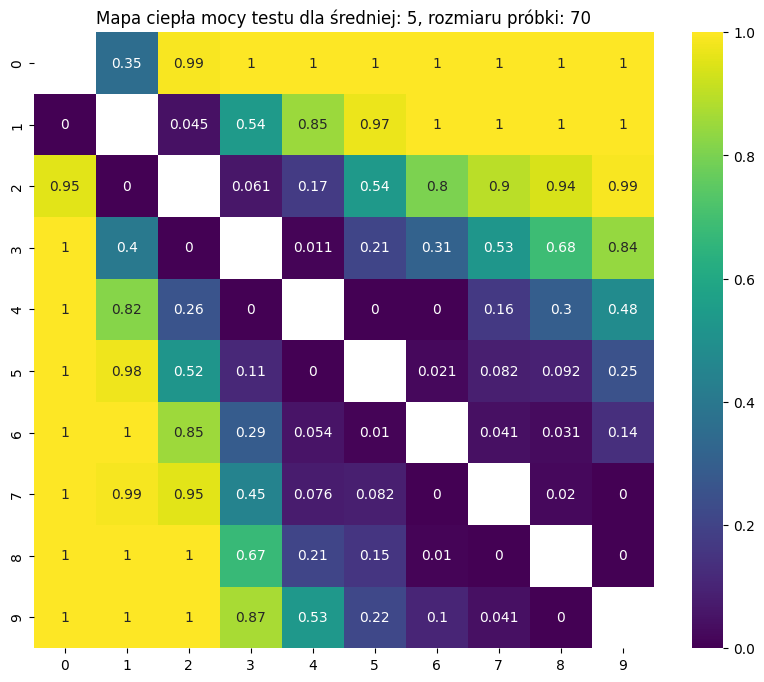

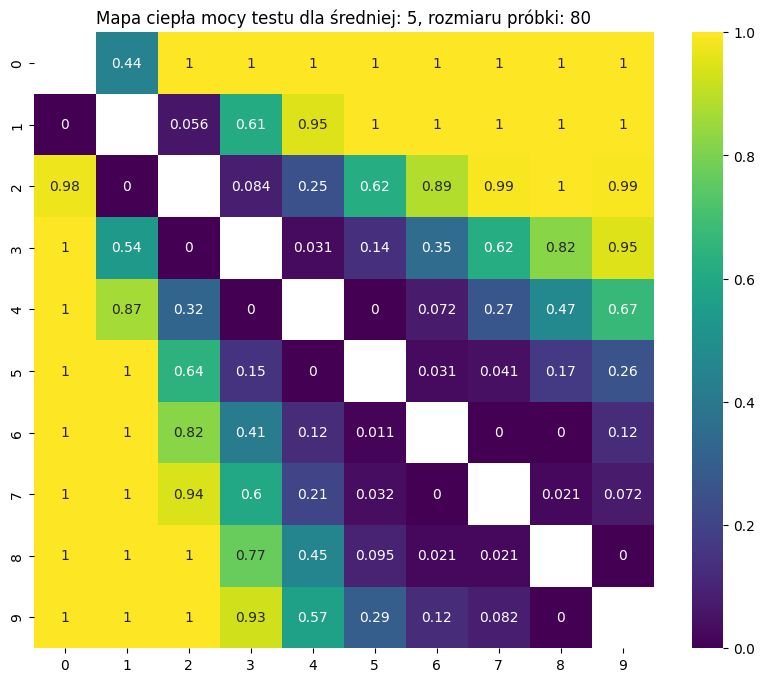

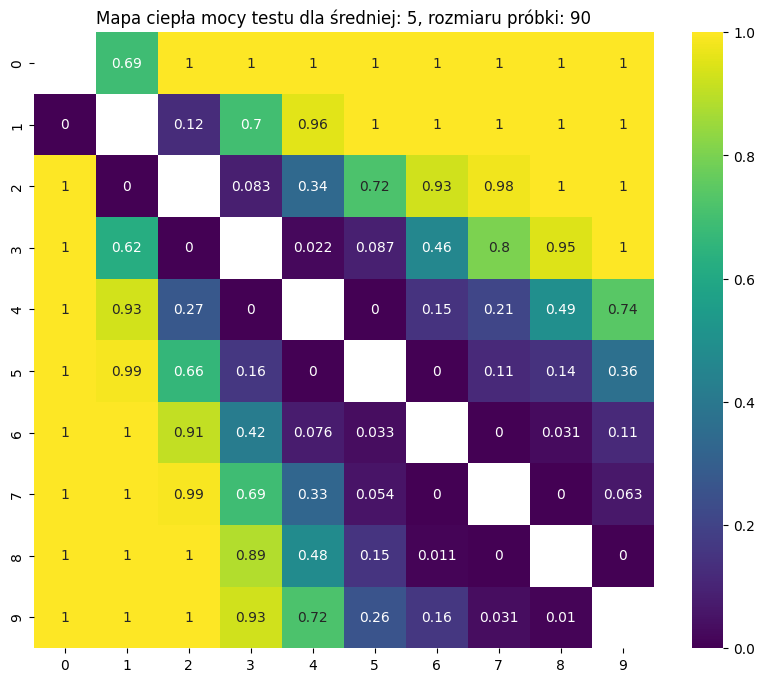

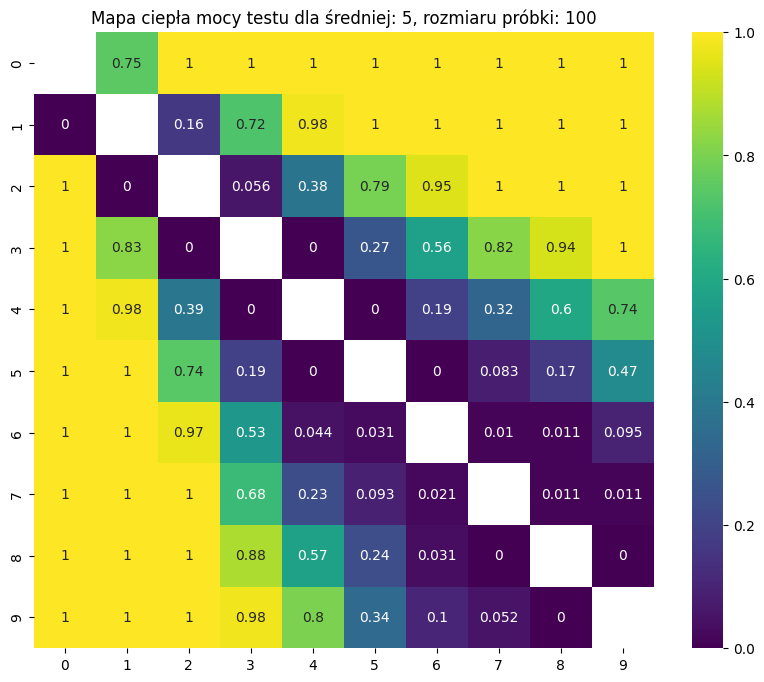

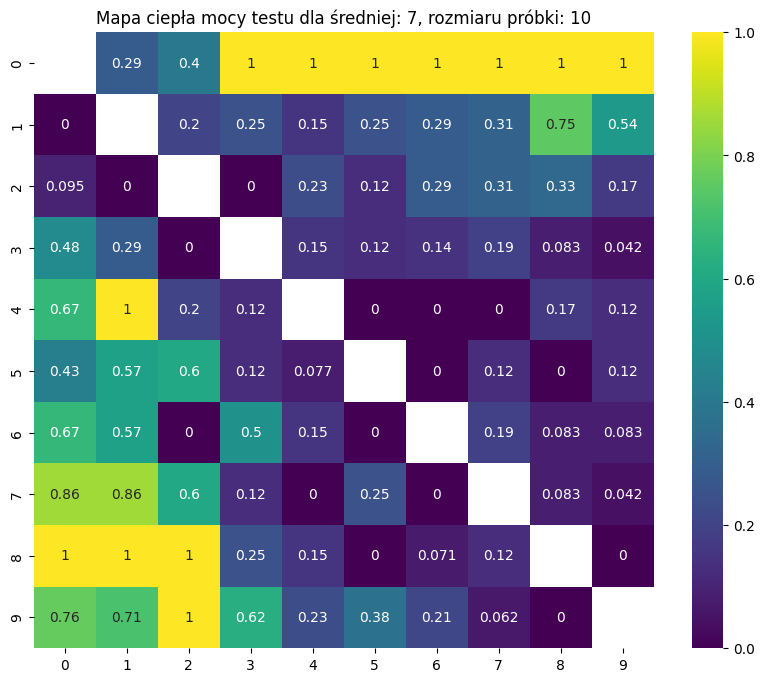

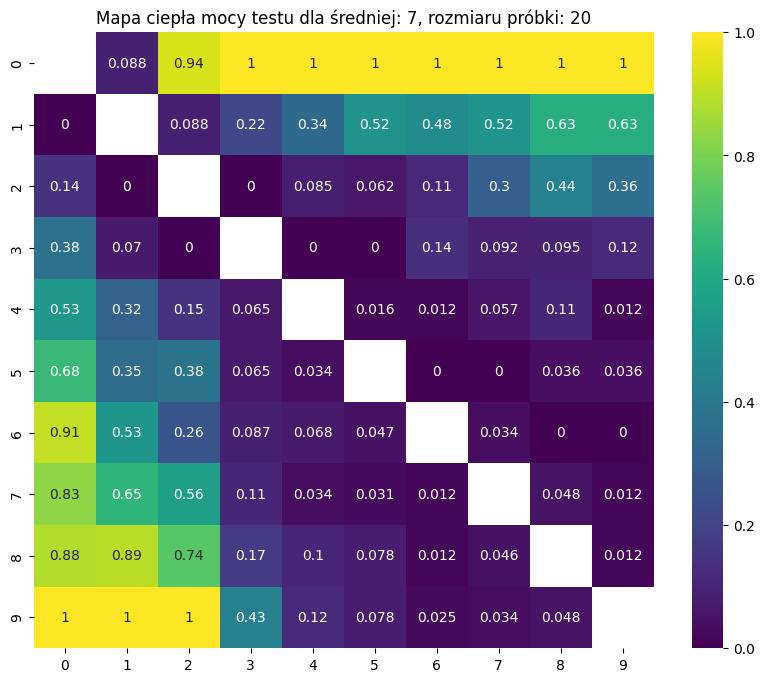

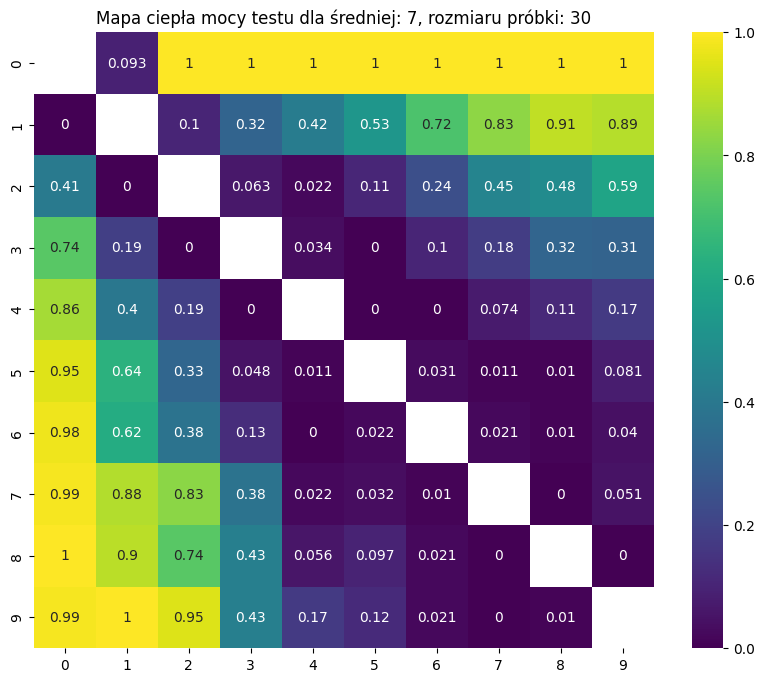

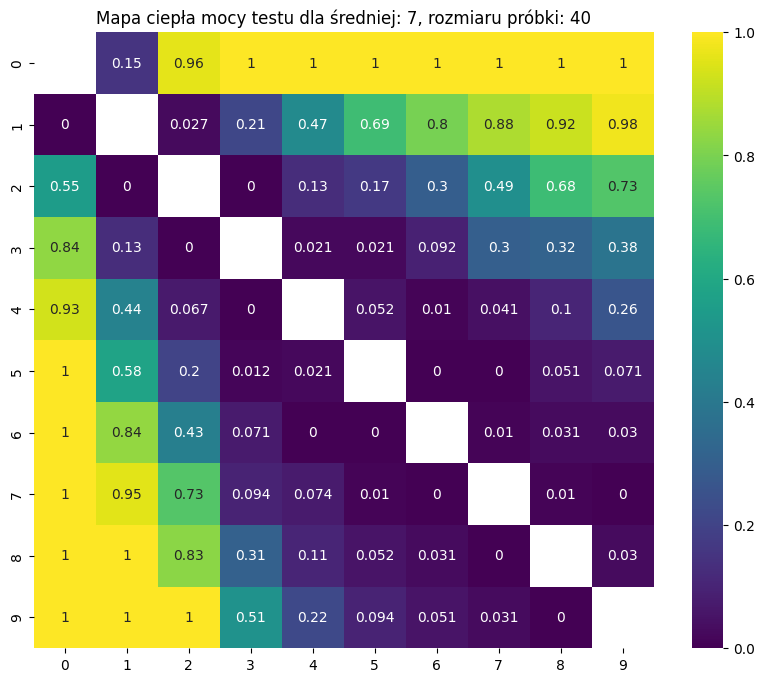

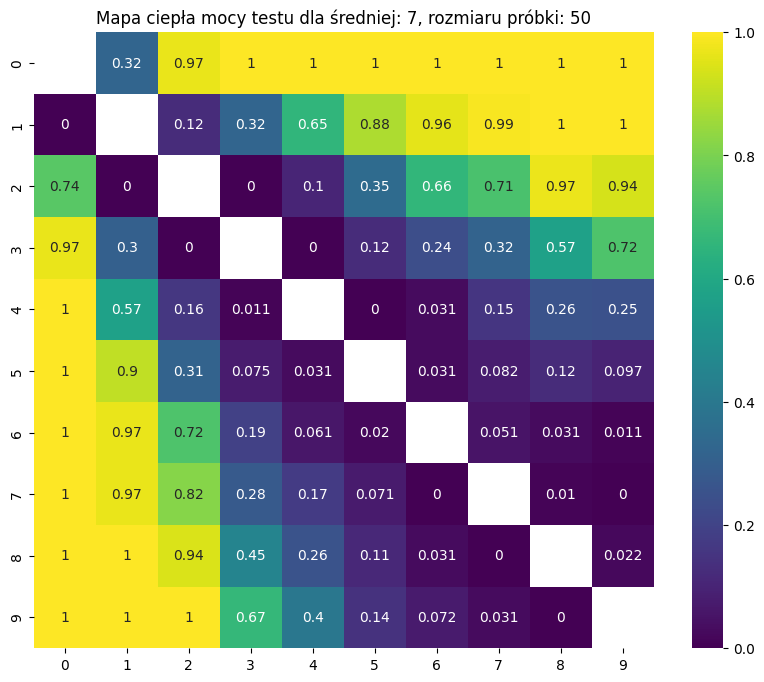

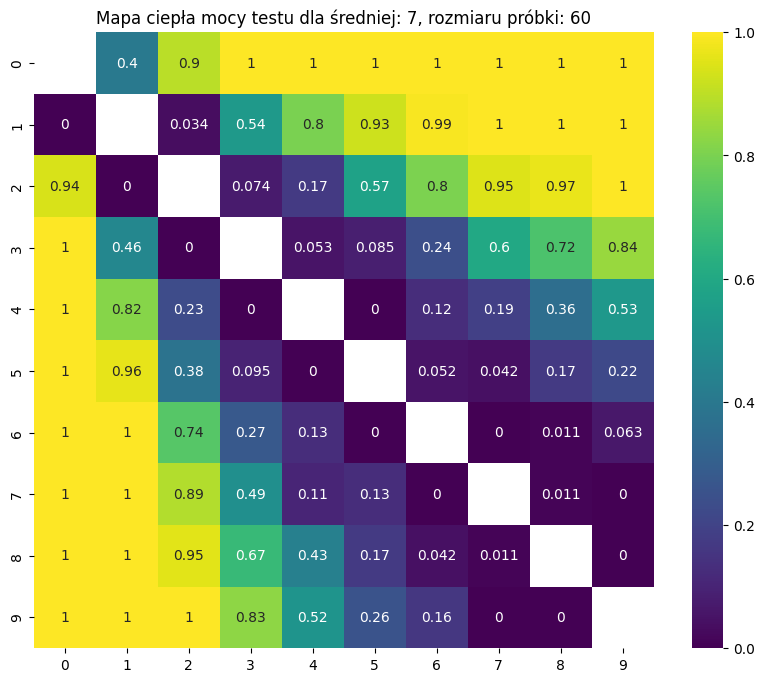

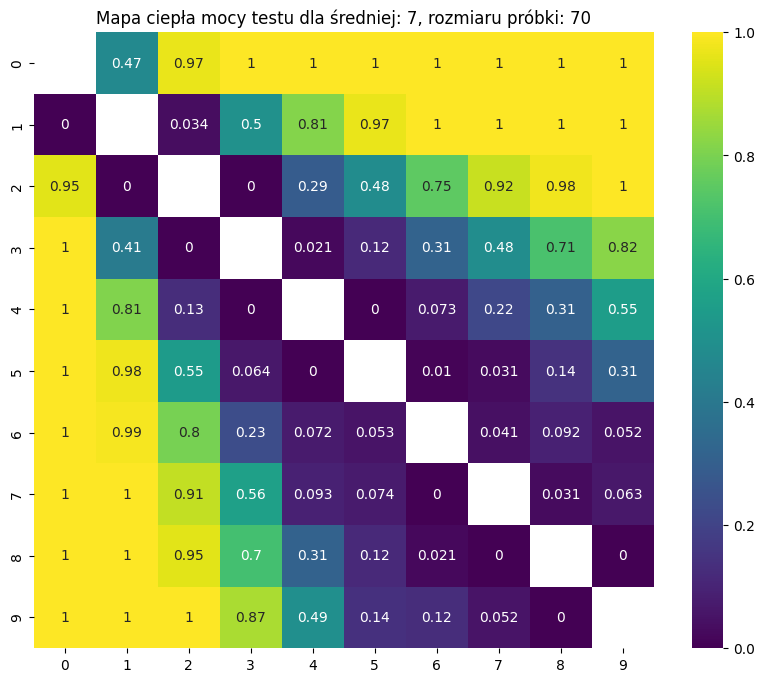

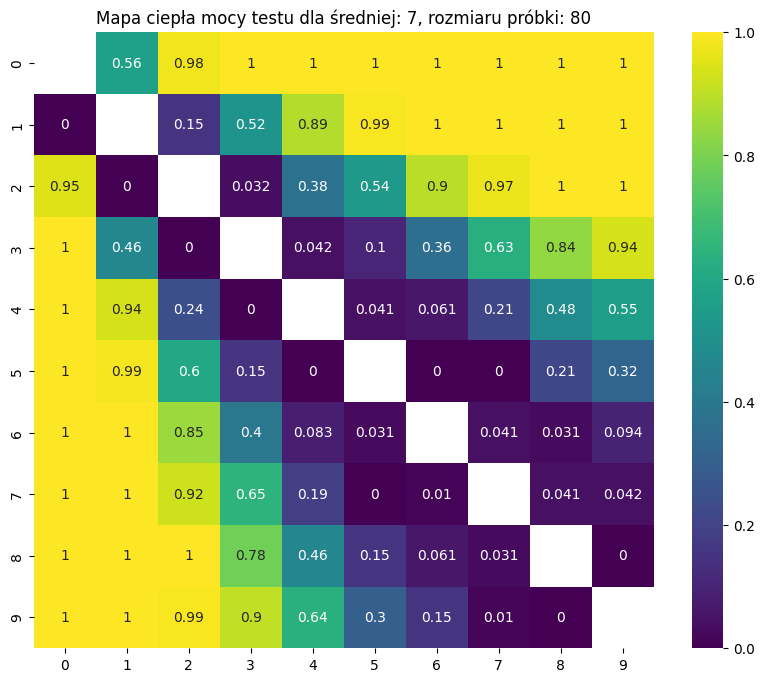

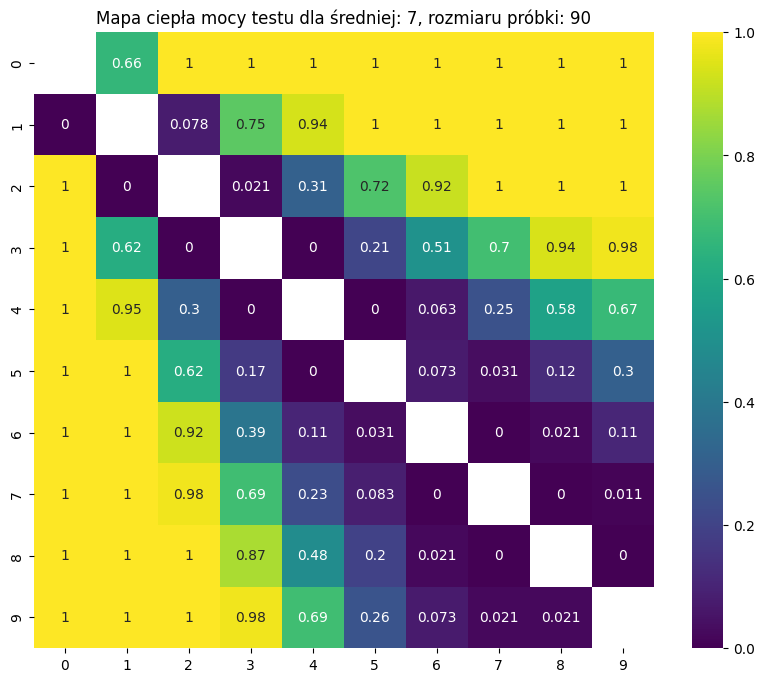

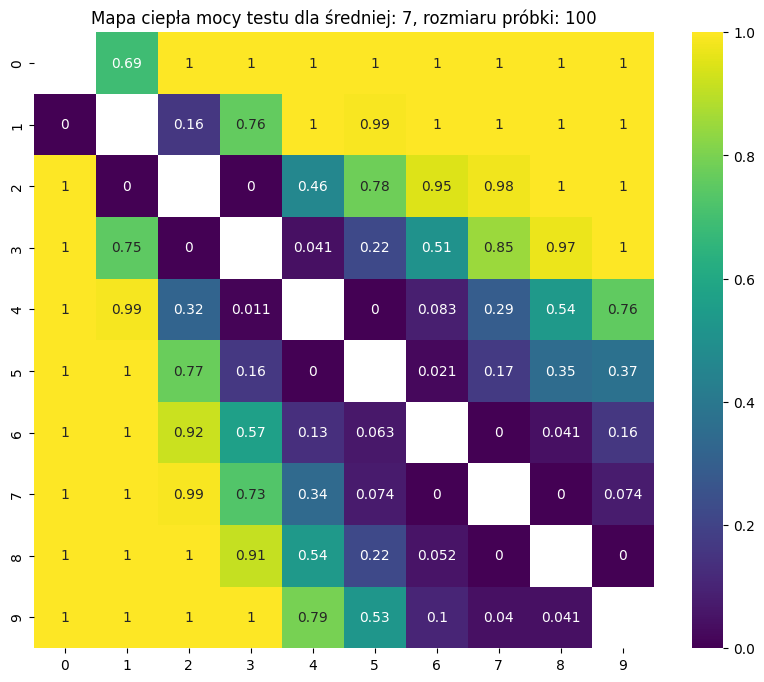

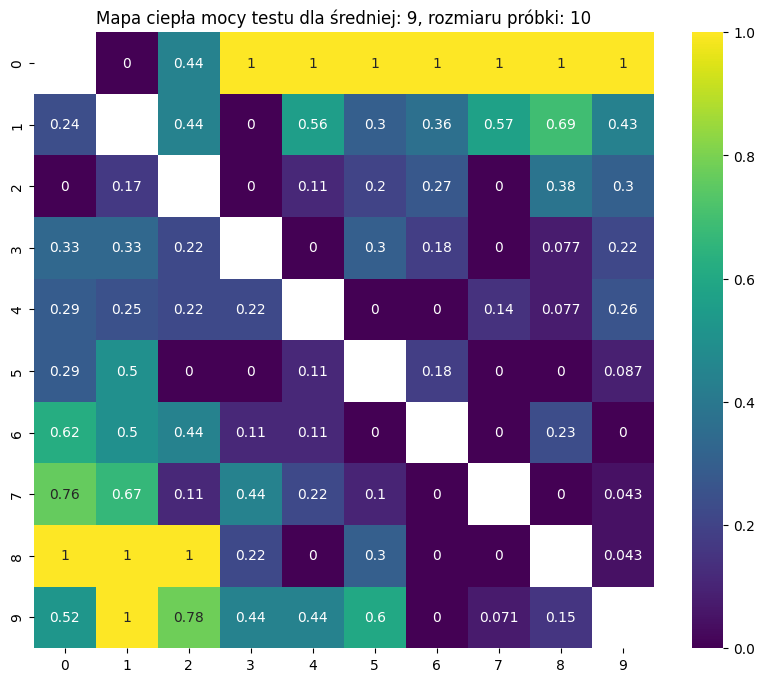

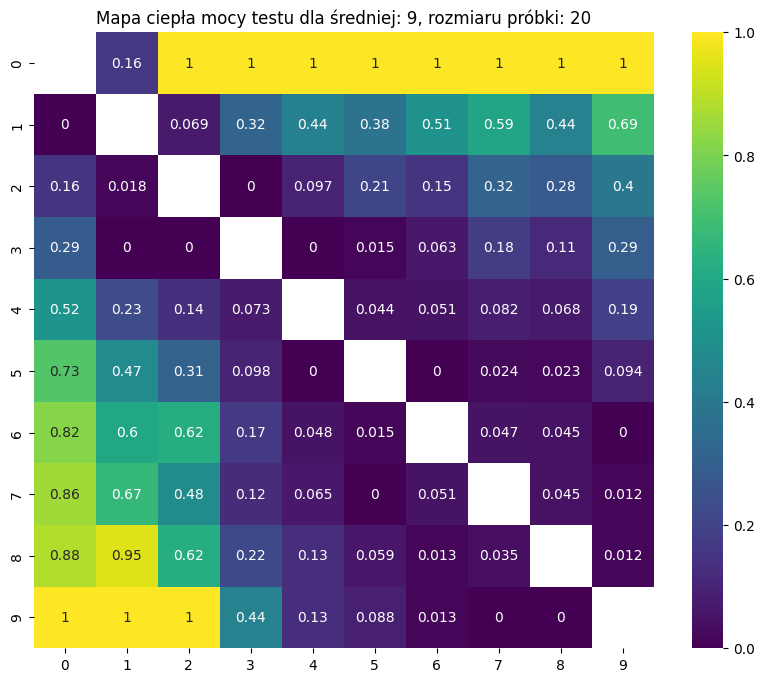

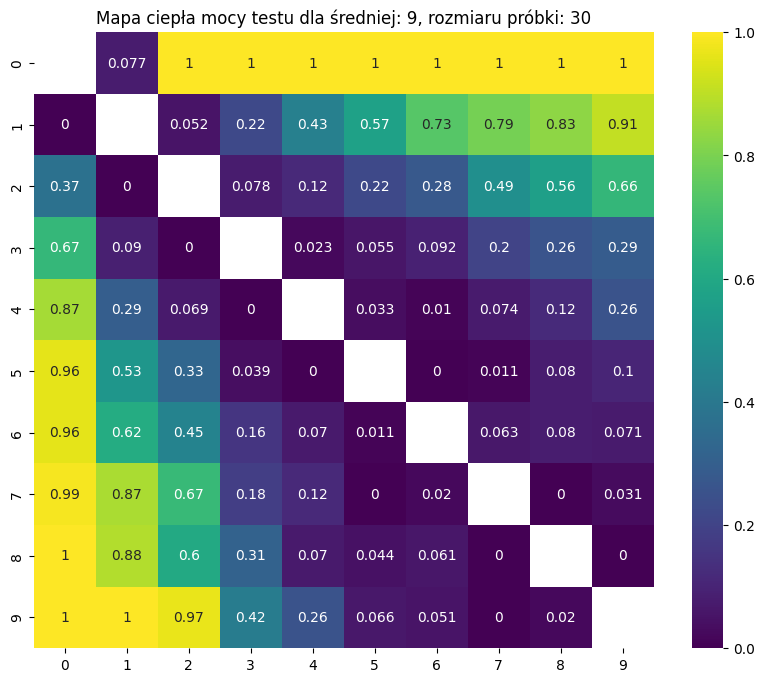

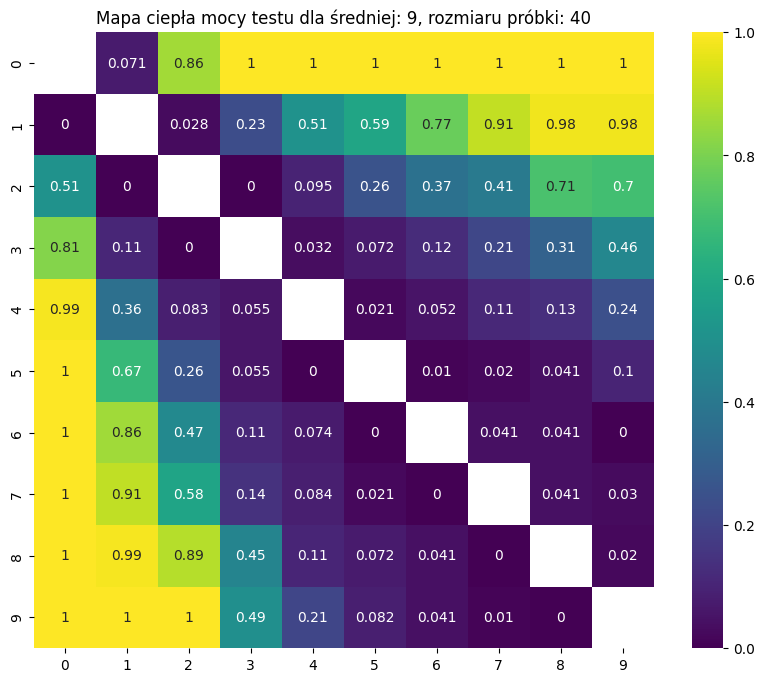

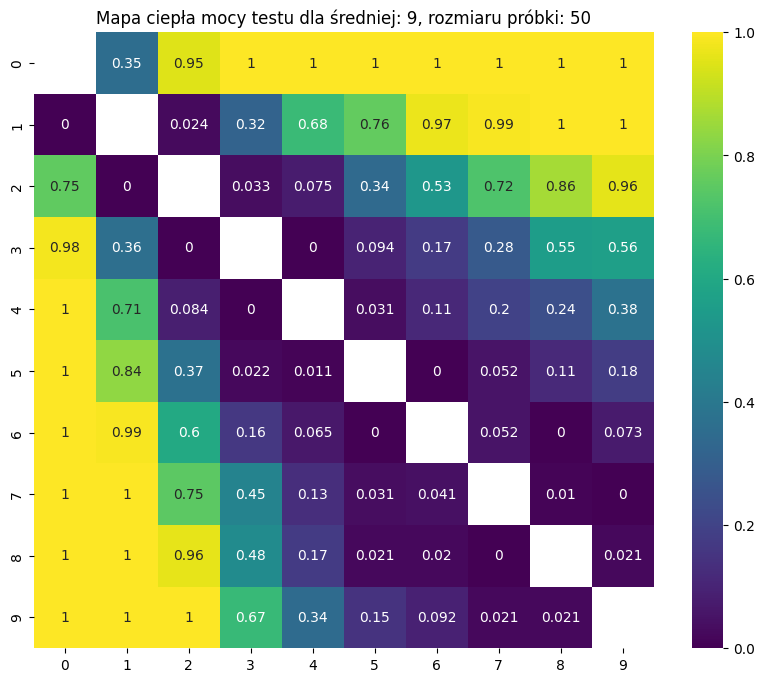

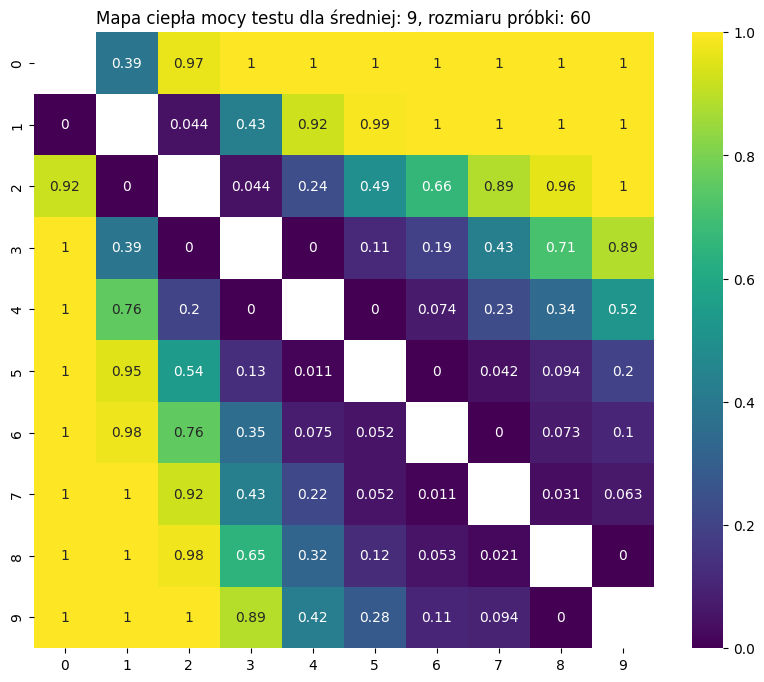

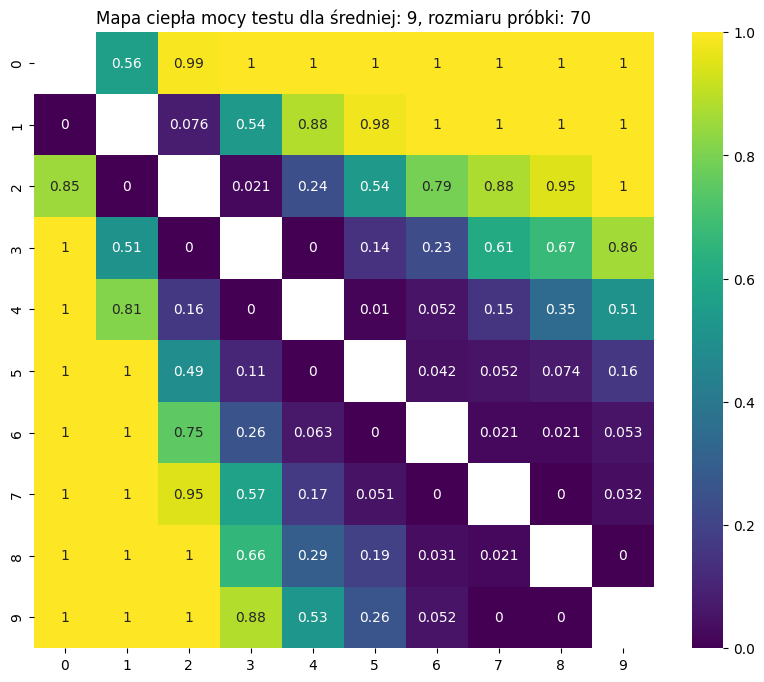

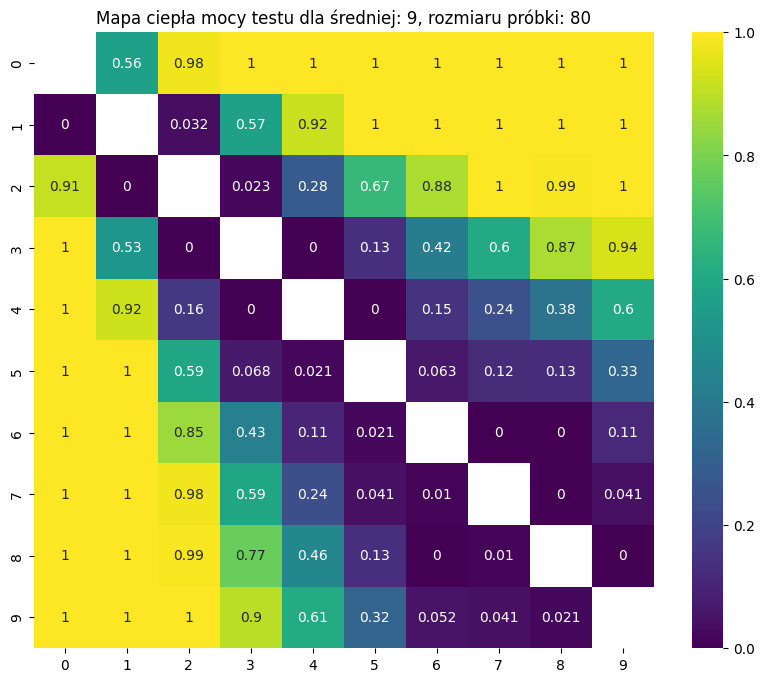

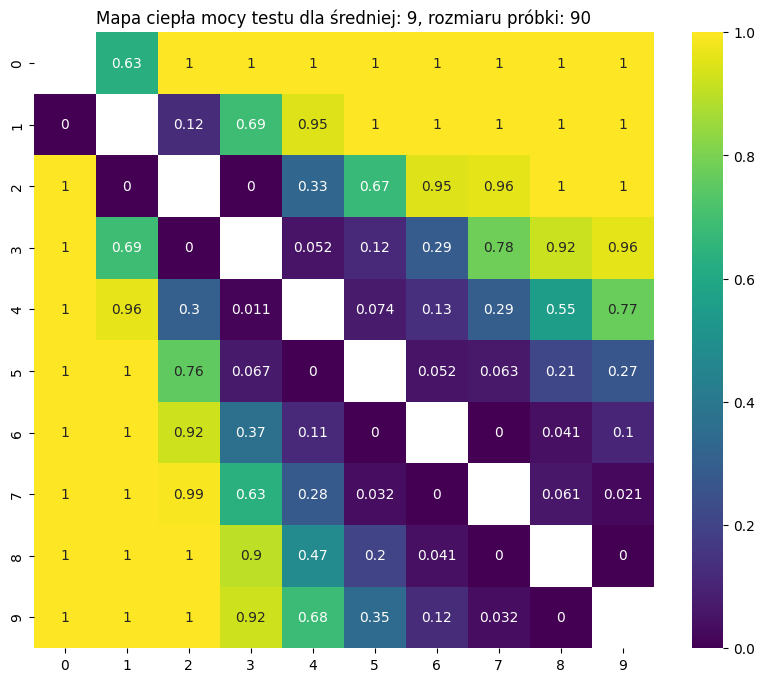

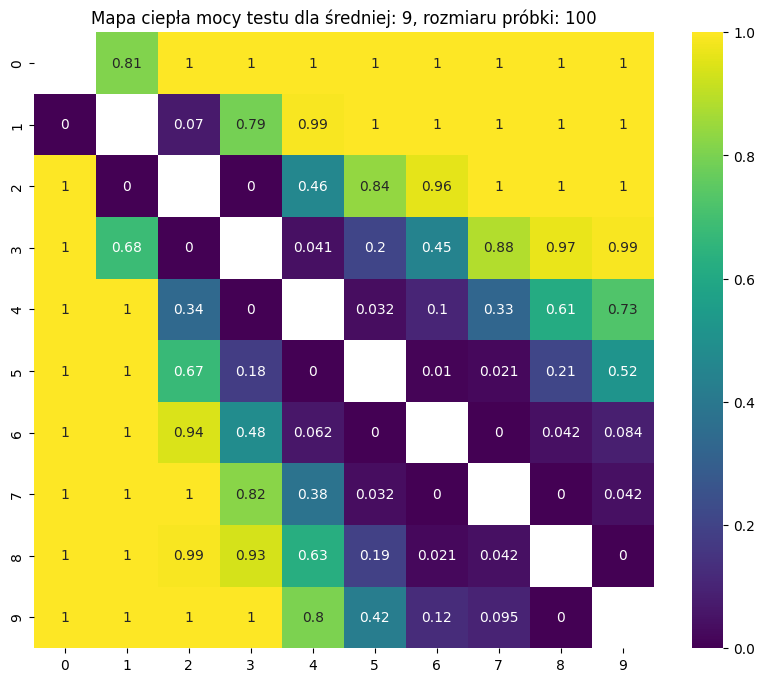

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Tworzenie instancji skalera
scaler = MinMaxScaler()

results_df = pd.DataFrame(results, columns=['mean', 'sample_size', 'std_dev1', 'std_dev2', 'power'])

# Dla każdej wartości oczekiwanej i próbki tworzymy osobną mapę
for mean in means:
    for sample in SampleSizes:
        # Wybieramy odpowiednie dane
        data = results_df[(results_df['mean'] == mean) & (results_df['sample_size'] == sample)]
        
        # Tworzymy tabelę przestawną
        pivot_table = data.pivot_table(index='std_dev1', columns='std_dev2', values='power')

        # Normalizacja danych
        normalized_data = scaler.fit_transform(pivot_table)

        # Rysujemy mapę ciepła
        plt.figure(figsize=(10, 8))
        sns.heatmap(normalized_data, annot=True, cmap='viridis')
        plt.title(f'Mapa ciepła mocy testu dla średniej: {mean}, rozmiaru próbki: {sample}')
        plt.show()


Interpretacja i wnioski:

Rozmiar próbki: Moc testu zwykle rośnie wraz ze wzrostem rozmiaru próbki. Większa próbka daje więcej informacji o populacji, co zwiększa szanse na wykrycie istotnego efektu, jeśli taki istnieje.
Odchylenie standardowe: Moc testu zwykle maleje wraz ze wzrostem odchylenia standardowego. Większe odchylenie standardowe oznacza większą zmienność w danych, co może utrudniać wykrycie istotnego efektu.
Jeśli moc testu jest niższa przy tych samych odchyleniach standardowych, może to wynikać z różnic w rozmiarach próbek. Na przykład, jeśli porównamy dwie próbki o tych samych odchyleniach standardowych, ale jedna próbka ma 100 obserwacji, a druga tylko 10, moc testu będzie prawdopodobnie większa dla większej próbki. To dlatego, że większa próbka daje więcej informacji, co zwiększa precyzję oszacowań i szanse na wykrycie istotnego efektu